# Diabetes Test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
Diabetes = pd.read_csv('Diabetes.csv')

In [4]:
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
Diabetes[Diabetes['Outcome']==1]['Outcome'].count()

268

Out of the 768 samples, there are 268 people who are a diabetic. 

### Finding Outliers

Outliers could affect the accuracy of the data which affects the predicability of the regression model. The following is one of the ways to calculate the lower and upper bound to determine an outlier. 

<b> Lowest possible  : Q1 - (1.5 x IQR)

Highest possible : Q3 + (1.5 x IQR)</b>

<AxesSubplot: >

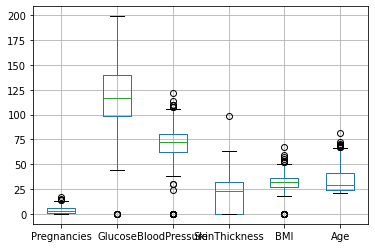

In [8]:
Diabetes.boxplot(column= ['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','Age'])

<AxesSubplot: >

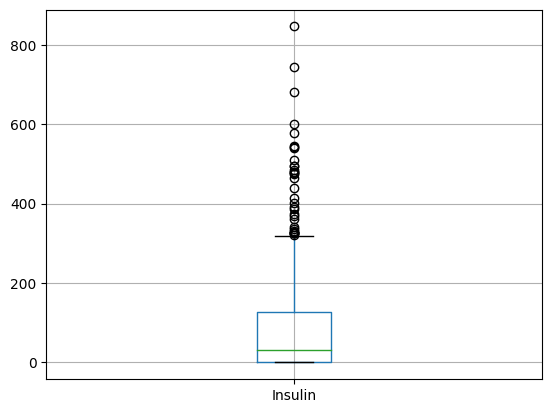

In [9]:
Diabetes.boxplot(column= ['Insulin'])

<AxesSubplot: >

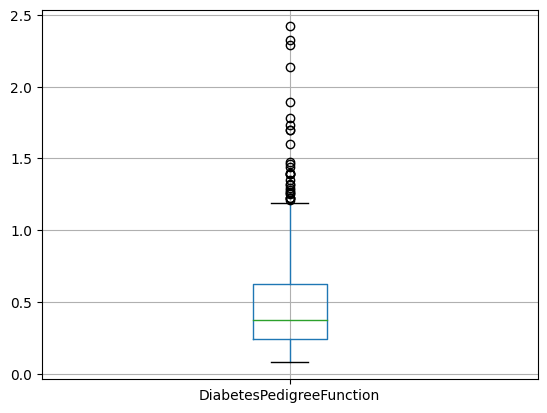

In [10]:
Diabetes.boxplot(column= ['DiabetesPedigreeFunction'])

In [11]:
def lowest_outlier(Q1, IQR):
  print(Q1 - 1.5*IQR)

In [12]:
def highest_outlier(Q3, IQR):
  print(Q3 + 1.5*IQR)

#### 1. Pregnancies

We will be looking at the range of pregnancies from the sample as well as its frequency. This is to make sure there is any outlier within the sample that has very big and very small number of frequency of pregnancy.

In [13]:
Diabetes['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [14]:
Q1_Pregnancies = np.percentile(Diabetes['Pregnancies'], [25])
Q3_Pregnancies = np.percentile(Diabetes['Pregnancies'], [75])
IQR_Pregnancies = Q3_Pregnancies - Q1_Pregnancies

In [15]:
lowest_outlier(Q1_Pregnancies,IQR_Pregnancies)

[-6.5]


In [16]:
highest_outlier(Q3_Pregnancies,IQR_Pregnancies)

[13.5]


Any BMI which are <u> <b> higher than 13.5 </b> </u> should be an outlier. It is not possible to have a negative value for pregnancies frequencies, thus we will ignore the lower bound for pregnancy.

There are 3 outliers in the Pregnancies data i.e. 14, 15 and 17 pregnancies. 

However, it is possible that the variation is caused by sampling problems and/or natural variation. We will therefore take note of these values for now while still keeping the reports during the cleaning process. 

#### 2. BMI
Checking the BMI values to check for any outliers. There is a normal range of BMI that should be expected.
The following BMI ranges (in kg/m2) classify different weight types:

Underweight: Less than 18.5.
Optimum range: 18.5 to 24.9.
Overweight: 25 to 29.9.
Class I obesity: 30 to 34.9.
Class II obesity: 35 to 39.9.
Class III obesity: More than 40.

In [17]:
BMI= Diabetes['BMI'].unique()
print(sorted(BMI))

[0.0, 18.2, 18.4, 19.1, 19.3, 19.4, 19.5, 19.6, 19.9, 20.0, 20.1, 20.4, 20.8, 21.0, 21.1, 21.2, 21.7, 21.8, 21.9, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.2, 29.3, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.6, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.1, 33.2, 33.3, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35.0, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36.0, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9

There is a very low and very high BMI value that should be investigated to see whether this is an outlier or an experience variance.

We assumed that the formula for BMI used in this case is as follow: 
<img src='https://www.exceldemy.com/wp-content/uploads/2022/06/How-to-Calculate-BMI-in-Excel13.png'>

A BMI of 0 can only be achieved if the height or weight of the person is zero. It is clearly impossible for a person to have 0 for a height or weights. Hence,  <u> <b> BMI of 0 is clearly an outlier. </b> </u> 

Therefore, this data should be dropped from the dataset.

In [18]:
clean_BMI = Diabetes[Diabetes["BMI"] >= 10]
clean_BMI 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
BMI_cleaned= clean_BMI['BMI'].unique()
print(sorted(BMI_cleaned))

[18.2, 18.4, 19.1, 19.3, 19.4, 19.5, 19.6, 19.9, 20.0, 20.1, 20.4, 20.8, 21.0, 21.1, 21.2, 21.7, 21.8, 21.9, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.2, 29.3, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.6, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.1, 33.2, 33.3, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35.0, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36.0, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38.

In [20]:
###Outlier upper and lower bound before omitting BMI=0
Q1_BMI = np.percentile(Diabetes['BMI'], [25])
Q3_BMI = np.percentile(Diabetes['BMI'], [75])
IQR_BMI = Q3_BMI - Q1_BMI

lowest_outlier(Q1_BMI,IQR_BMI)
highest_outlier(Q3_BMI,IQR_BMI)

[13.35]
[50.55]


In [21]:
###Outlier upper and lower bound after omitting BMI=0
Q1_BMI_cleaned = np.percentile(clean_BMI['BMI'], [25])
Q3_BMI_cleaned = np.percentile(clean_BMI['BMI'], [75])
IQR_BMI_cleaned = Q3_BMI_cleaned - Q1_BMI_cleaned

lowest_outlier(Q1_BMI_cleaned,IQR_BMI_cleaned)
highest_outlier(Q3_BMI_cleaned,IQR_BMI_cleaned)

[13.85]
[50.25]


<AxesSubplot: >

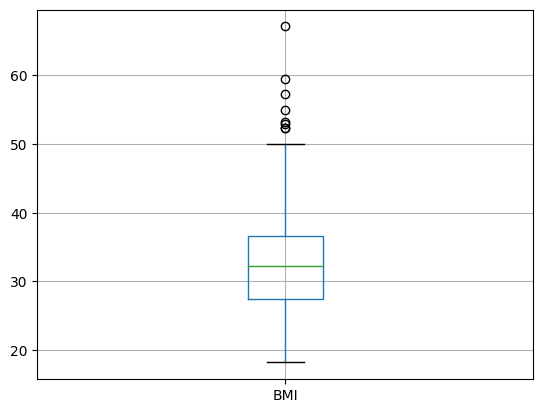

In [22]:
clean_BMI.boxplot(column='BMI')

In [23]:
clean_BMI[clean_BMI['BMI']>=50.25]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
177,0,129,110,46,130,67.1,0.319,26,1
193,11,135,0,0,0,52.3,0.578,40,1
247,0,165,90,33,680,52.3,0.427,23,0
303,5,115,98,0,0,52.9,0.209,28,1
445,0,180,78,63,14,59.4,2.420,25,1
673,3,123,100,35,240,57.3,0.880,22,0


Any BMI which are <u> <b> lower than 13.85  </b> </u> or <u> <b> higher than 50.25 </b> </u> should be an outlier.  We will drop this dataset together with the other outliers detected later. 

There is a  <u> <b>record with a BMI of 67.1  </b> </u> and this is very far off from the other values. It would be better to <u> <b> omit this outlier to improve the accuracy of the model. </b> </u>

As for other samples with <b> <u> BMI >=50.35 but is still 60 </u> </b>, it is arguable whether this is possible or not.Theoretically, a higher BMI are more likely to get diabetes, but <b> <u> we will investigate this further before imposing further actions.</u> <b>,

#### 3. Glucose

In [24]:
Glucose= Diabetes['Glucose'].unique()
print(sorted(Glucose))

[0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199]


<AxesSubplot: >

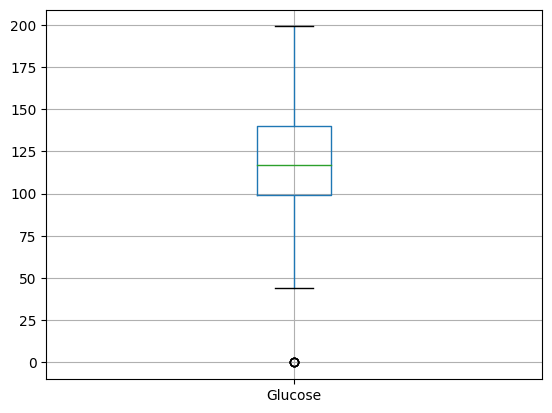

In [25]:
Diabetes.boxplot(column='Glucose')

It is weird to have a 0 for blood glucose reading. We will investigate this further.

In [26]:
Diabetes[Diabetes['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [27]:
Q1_Glucose = np.percentile(Diabetes['Glucose'], [25])
Q3_Glucose= np.percentile(Diabetes['Glucose'], [75])
IQR_Glucose= Q3_Glucose - Q1_Glucose

lowest_outlier(Q1_Glucose,IQR_Glucose)
highest_outlier(Q3_Glucose,IQR_Glucose)

[37.125]
[202.125]


The percentage of missing glucose reading is below 1%. For these records, there are informations in other columns which could be useful during the modelling. Thus, we will be <u><b>keeping the records with glucose level 0.

#### 4. Blood Pressure

In [28]:
Blood_Pressure= Diabetes['BloodPressure'].unique()
print(sorted(Blood_Pressure))

[0, 24, 30, 38, 40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60, 61, 62, 64, 65, 66, 68, 70, 72, 74, 75, 76, 78, 80, 82, 84, 85, 86, 88, 90, 92, 94, 95, 96, 98, 100, 102, 104, 106, 108, 110, 114, 122]


In [29]:
Diabetes[(Diabetes['BloodPressure']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [30]:
Diabetes.loc[(Diabetes['BloodPressure']==0)].count()

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

While a blood pressure of 0 does not necessarily impact the diabetes test outcome, including these records might impact the reliability of the model if blood pressure is included as a regression variable.

In [31]:
Q1_BloodPressure = np.percentile(Diabetes['BloodPressure'], [25])
Q3_BloodPressure= np.percentile(Diabetes['BloodPressure'], [75])
IQR_BloodPressure= Q3_BloodPressure - Q1_BloodPressure

lowest_outlier(Q1_BloodPressure,IQR_BloodPressure)
highest_outlier(Q3_BloodPressure,IQR_BloodPressure)

[35.]
[107.]


In [32]:
Diabetes[Diabetes['BloodPressure']>=107]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9,171,110,24,240,45.4,0.721,54,1
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0
177,0,129,110,46,130,67.1,0.319,26,1
362,5,103,108,37,0,39.2,0.305,65,0
549,4,189,110,31,0,28.5,0.680,37,0
691,13,158,114,0,0,42.3,0.257,44,1


Any blood pressure level which are <u> <b> lower than 40  </b> </u> or <u> <b> higher than 104 </b> </u> should be an outlier. 

For blood pressure level which are lower than 35, there are some records with blood pressure level equal to 0. It should be impossible for a person to have a blood pressure level of 0. However, we are not sure how this blood pressure is calculated. There are also values that might be useful for the analysis.  <u> <b>For records with blood pressure lower than 35,</b> </u> we will <u> <b>keep the data for further analysis.</b> </u> 

For data with <u> <b> blood pressure higher than 107, we will keep the data for further analysis.<u> <b> 

#### 5. Skin Thickness

In [33]:
Diabetes.groupby('SkinThickness').count()[:5]

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
SkinThickness,,,,,,,,
0,227,227,227,227,227,227,227,227
7,2,2,2,2,2,2,2,2
8,2,2,2,2,2,2,2,2
10,5,5,5,5,5,5,5,5
11,6,6,6,6,6,6,6,6


<AxesSubplot: >

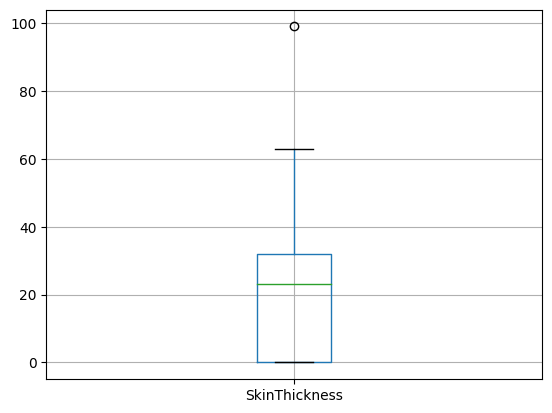

In [34]:
Diabetes.boxplot(column='SkinThickness')

<AxesSubplot: >

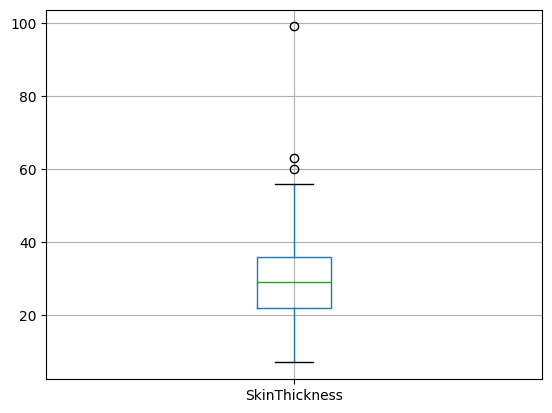

In [35]:
Diabetes_SkinThickness_Cleaned = Diabetes.loc[(Diabetes['SkinThickness']>0)]
Diabetes_SkinThickness_Cleaned.boxplot(column='SkinThickness')

In [36]:
Diabetes[Diabetes['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [37]:
Q1_SkinThickness = np.percentile(Diabetes['SkinThickness'], [25])
Q3_SkinThickness= np.percentile(Diabetes['SkinThickness'], [75])
IQR_SkinThickness= Q3_SkinThickness - Q1_SkinThickness

lowest_outlier(Q1_SkinThickness,IQR_SkinThickness)
highest_outlier(Q3_SkinThickness,IQR_SkinThickness)

[-48.]
[80.]


In [38]:
Diabetes[Diabetes['SkinThickness']>=80]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


While a skin thickness of 0 could looks a bit weird, it does not necessarily impact the outcome of the diabetes test. We suspect that this might be due to incomplete information due to the complexitiy of conducting test for this variable. As we are not sure of the way skin thickness is measured and given that these records have meaningful values of other variables, it will be best to <u> <b>keep records with skin thickness of 0 </b> </u> to avoid omitting necessary information. 

 <u> <b>The percentage of records with a skin thickness of 0 is at least 30% of the entire dataset</b> </u>. We believe that it will be best to <u> <b>not use this variable </b> </u> in the modelling. 

#### 6. Insulin

In [39]:
Diabetes.groupby('Insulin').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Insulin,,,,,,,,
0,374,374,374,374,374,374,374,374
14,1,1,1,1,1,1,1,1
15,1,1,1,1,1,1,1,1
16,1,1,1,1,1,1,1,1
18,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
579,1,1,1,1,1,1,1,1
600,1,1,1,1,1,1,1,1
680,1,1,1,1,1,1,1,1


In [40]:
Diabetes[Diabetes['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [41]:
Q1_Insulin = np.percentile(Diabetes['Insulin'], [25])
Q3_Insulin= np.percentile(Diabetes['Insulin'], [75])
IQR_Insulin= Q3_Insulin - Q1_Insulin

lowest_outlier(Q1_Insulin,IQR_Insulin)
highest_outlier(Q3_Insulin,IQR_Insulin)

[-190.875]
[318.125]


While an insulin level of 0 looks impossible, it does not necessarily impact the outcome of the diabetes test. 

There are a lot of records with insulin of 0. It is possible that this is caused by incomplete reporting due to the difficulty to measure insulin. Thus, it will be best to <u> <b> keep records with insulin of 0 </b> </u> to prevent omitting information.

<u> <b>The percentage of records with a insulin of 0 is at least 48% of the entire dataset which is almost 50% of the whole dataset.</b> </u>. We believe that it will be best to <u> <b>not use this variable </b> </u> in the modelling. 

#### 7. Diabetes Pedigree Function

<AxesSubplot: >

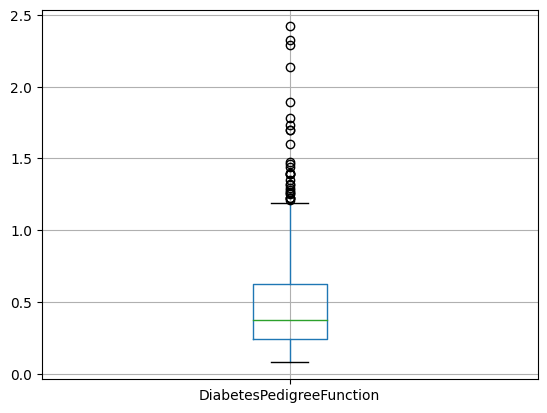

In [42]:
Diabetes.boxplot(column='DiabetesPedigreeFunction')

In [43]:
Diabetes.groupby('DiabetesPedigreeFunction').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
DiabetesPedigreeFunction,,,,,,,,
0.078,1,1,1,1,1,1,1,1
0.084,1,1,1,1,1,1,1,1
0.085,2,2,2,2,2,2,2,2
0.088,2,2,2,2,2,2,2,2
0.089,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
1.893,1,1,1,1,1,1,1,1
2.137,1,1,1,1,1,1,1,1
2.288,1,1,1,1,1,1,1,1


In [44]:
Q1_DiabetesPedigreeFunction = np.percentile(Diabetes['DiabetesPedigreeFunction'], [25])
Q3_DiabetesPedigreeFunction= np.percentile(Diabetes['DiabetesPedigreeFunction'], [75])
IQR_DiabetesPedigreeFunction= Q3_DiabetesPedigreeFunction - Q1_DiabetesPedigreeFunction

lowest_outlier(Q1_DiabetesPedigreeFunction,IQR_DiabetesPedigreeFunction)
highest_outlier(Q3_DiabetesPedigreeFunction,IQR_DiabetesPedigreeFunction)

[-0.33]
[1.2]


In [45]:
Diabetes[Diabetes['DiabetesPedigreeFunction']>1.2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
39,4,111,72,47,207,37.1,1.390,56,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
100,1,163,72,0,0,39.0,1.222,33,1
147,2,106,64,35,119,30.5,1.400,34,0
187,1,128,98,41,58,32.0,1.321,33,1
218,5,85,74,22,0,29.0,1.224,32,1
228,4,197,70,39,744,36.7,2.329,31,0


Any Diabetes Pedigree Function level which are <u> <b> higher than 1.2 </b> </u> is an outlier

However, there is no data points that stand out. Thus, we will retain all data points for further analysis. 

#### 8. Age

In [46]:
Diabetes.groupby('Age').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Age,,,,,,,,
21,63,63,63,63,63,63,63,63
22,72,72,72,72,72,72,72,72
23,38,38,38,38,38,38,38,38
24,46,46,46,46,46,46,46,46
25,48,48,48,48,48,48,48,48
26,33,33,33,33,33,33,33,33
27,32,32,32,32,32,32,32,32
28,35,35,35,35,35,35,35,35
29,29,29,29,29,29,29,29,29


In [47]:
Q1_Age = np.percentile(Diabetes['Age'], [25])
Q3_Age= np.percentile(Diabetes['Age'], [75])
IQR_Age= Q3_Age - Q1_Age

lowest_outlier(Q1_Age,IQR_Age)
highest_outlier(Q3_Age,IQR_Age)

[-1.5]
[66.5]


Record of people who are <u> <b> older than 66.5 years old </b> </u> should be an outlier.

However, the small amount of people of age above 66 could be a natural varation. Therefore, we will <b> <u> retain all data for further analysis. 

### Dropping the outliers

Below are the summary of outliers that have to be omitted from the data: 
- Retain all pregnancies data
- BMI of 0 and 67.1
- Skin Thickness level 0 and 99
- Glucose level 0
- Blood Pressure level 0 
- Insulin level 0
- Retain all Diabetes Pedigree Function
- Retain all Age data

In [48]:
Diabetes_cleaned =Diabetes.loc[(Diabetes['BMI']>0) & 
                               (Diabetes['BMI']<67.1)]

In [49]:
Diabetes_cleaned.count()

Pregnancies                 756
Glucose                     756
BloodPressure               756
SkinThickness               756
Insulin                     756
BMI                         756
DiabetesPedigreeFunction    756
Age                         756
Outcome                     756
dtype: int64

We have deleted at around 40% of records from the original data. However, 391 is quite a substantial data to perform regression and sampling.

In [50]:
Diabetes_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,3.849206,121.125661,69.637566,20.740741,80.776455,32.411640,0.472640,33.291005,0.350529
std,3.369283,32.081375,18.236442,15.892569,115.773581,6.813761,0.329645,11.702492,0.477452
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,129.250000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,59.400000,2.420000,81.000000,1.000000


### Data Exploration

Exploring data in the cleaned dataset.

Using Pairplot to see correlation between variables. 

<b>References: https://seaborn.pydata.org/generated/seaborn.pairplot.html </b> 


There are also other ways to explore the data

<b> Reference: https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751 </b> 

<AxesSubplot: >

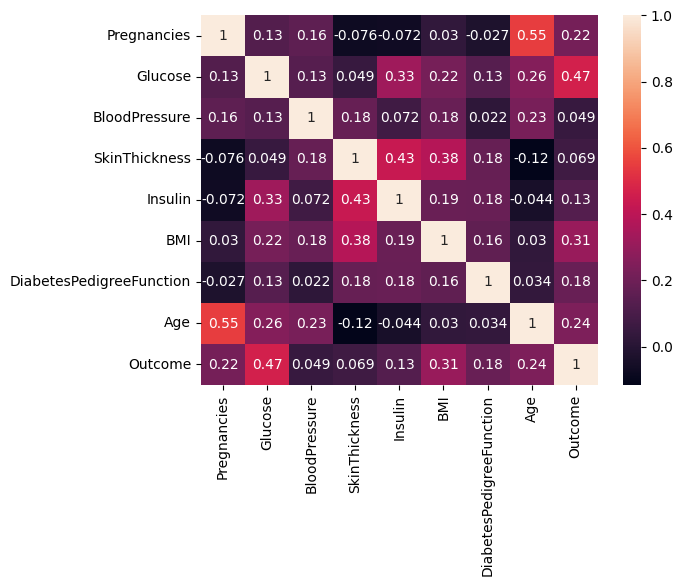

In [51]:
sns.heatmap(Diabetes_cleaned.corr(), annot=True)

There is a relatively high correlation between these variables: 
<b>
- Pregnancies and Age 
- Skin Thickness and BMI 
</b> 

There is a moderately high correlation between these variable: 
<b>
- Glucose and Insulin
- Glucose and Outcome
</b> 

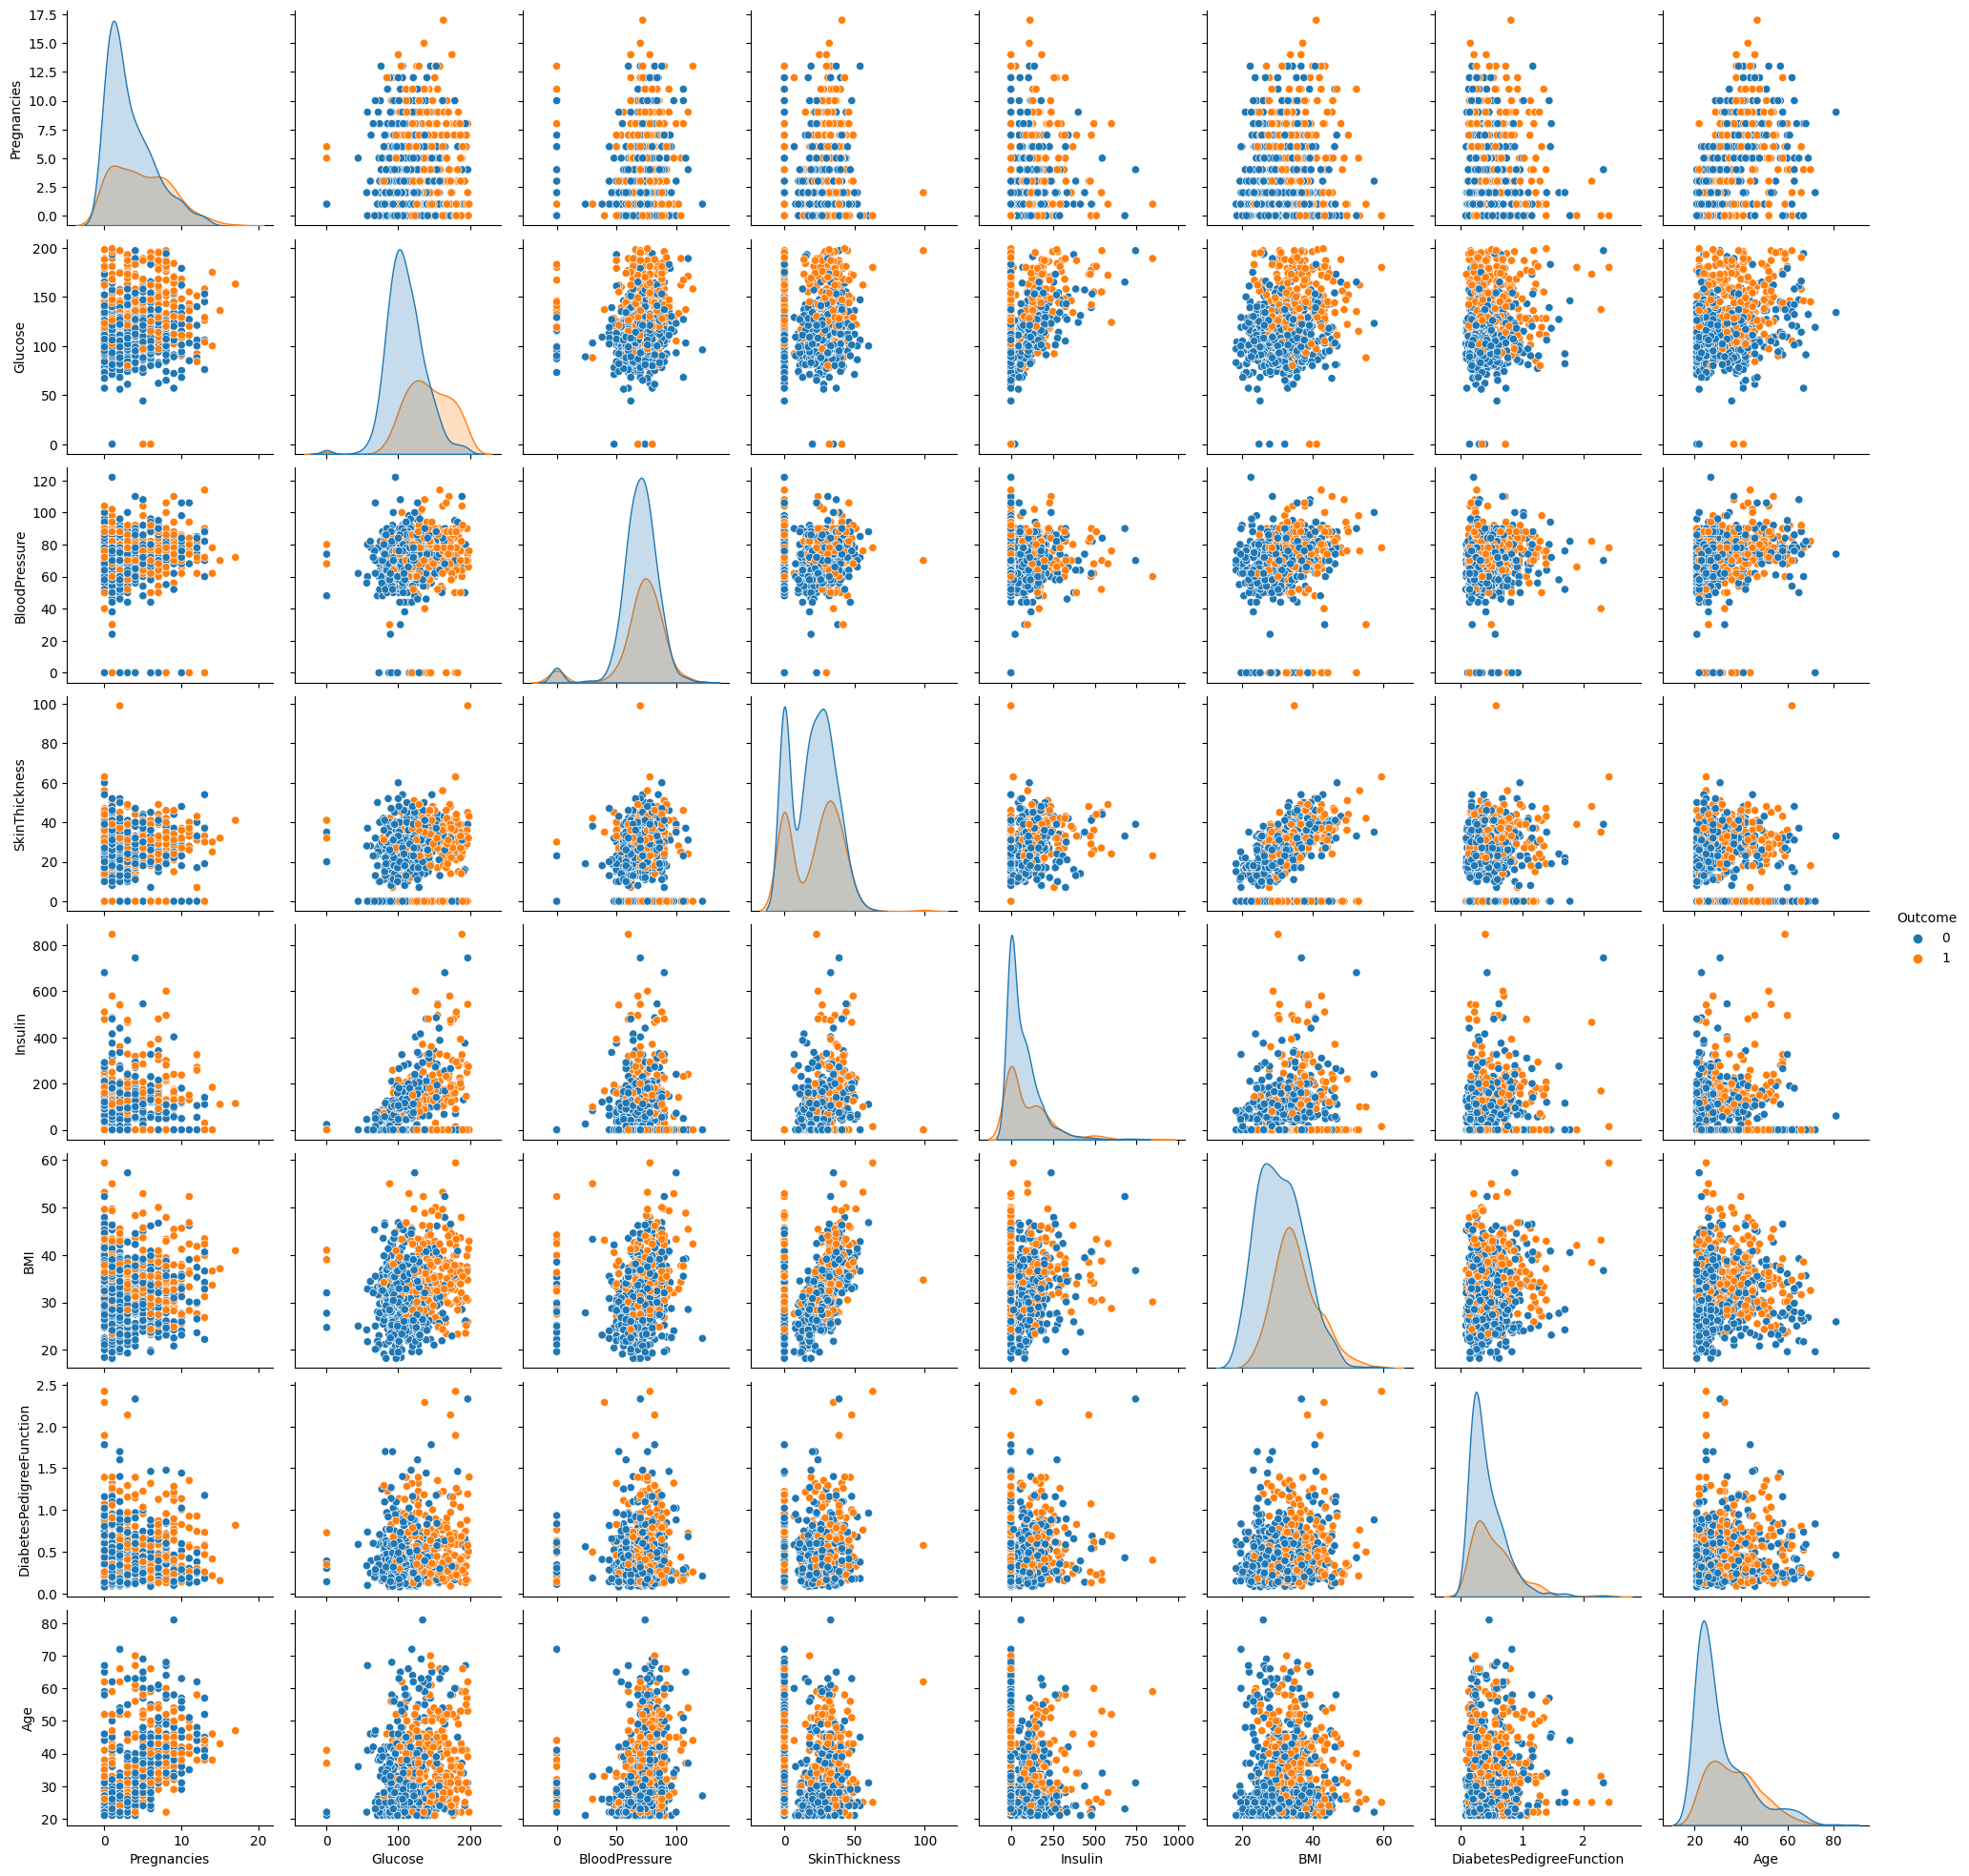

In [52]:
sns.pairplot(Diabetes_cleaned,hue='Outcome')

Plotting to see if there are any interactions between the variables below: 
<b> 
- Pregnancies and Age 
- Skin Thickness and BMI 
- Glucose and Insulin
- Glucose and Outcome

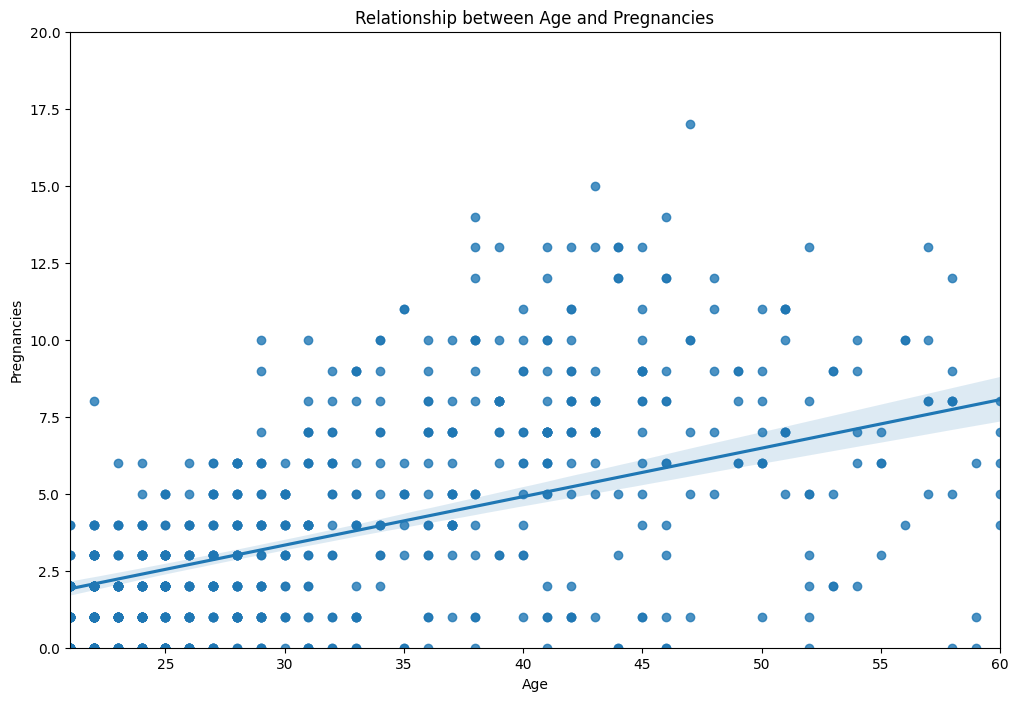

In [53]:
plt.figure(figsize=(12, 8))

sns.regplot(x=Diabetes_cleaned['Age'], y=Diabetes_cleaned['Pregnancies'])

plt.xlim([21, 60])
plt.ylim([0, 20])

plt.title('Relationship between Age and Pregnancies')
plt.show()

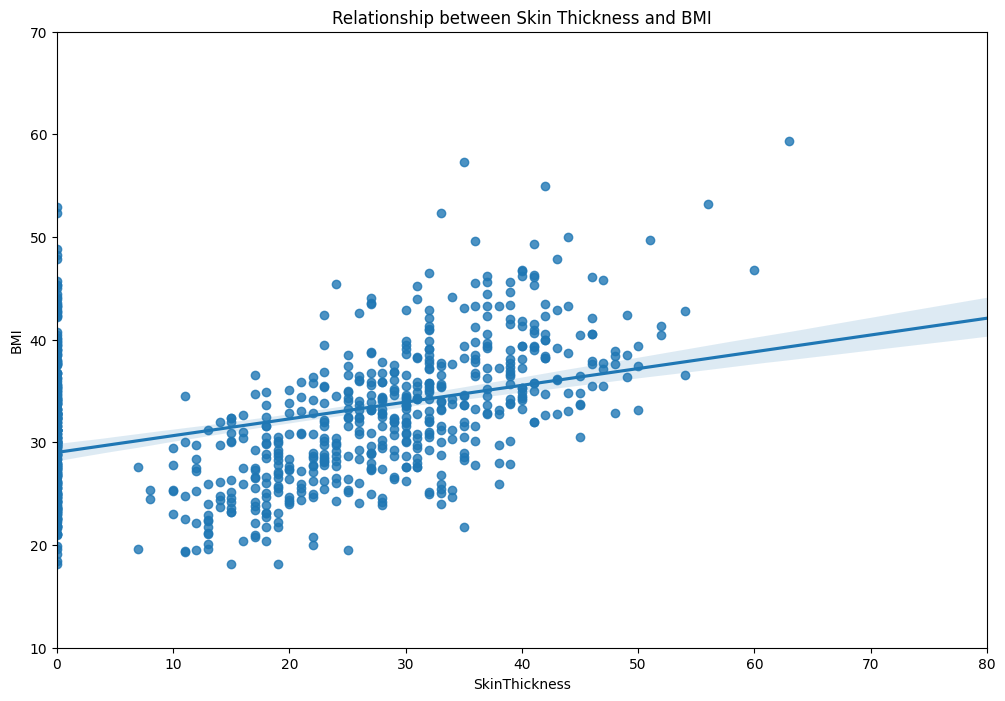

In [54]:
plt.figure(figsize=(12, 8))

sns.regplot(x=Diabetes_cleaned['SkinThickness'], y=Diabetes_cleaned['BMI'])

plt.xlim([0, 80])
plt.ylim([10, 70])

plt.title('Relationship between Skin Thickness and BMI')
plt.show()

### Logistic Regression 

Based on our data, the dependent variable is the outcome column. As the outcome column could only take the value 1 or 0, logistic regression could be one of the way to model this data.

We will be conducting logistic regression with the data from First Round of Cleaning and Second Round of Cleaning to see if filtering out the insulin level add another value to the model.

###### First round

In [55]:
from sklearn.linear_model import LogisticRegression             #For logistic regression
from sklearn import metrics                                     #For accuracy calculation
from sklearn.model_selection import train_test_split

In [56]:
X_raw = Diabetes[['Pregnancies', 'Glucose', 'BloodPressure','BMI','DiabetesPedigreeFunction', 'Age','SkinThickness',
                 'Insulin']]
Y_raw = Diabetes['Outcome']

log_reg = LogisticRegression(solver = 'liblinear')

X_train_raw, X_test_raw, Y_train_raw, Y_test_raw = train_test_split(X_raw, Y_raw, test_size = 0.2, random_state = 101)

#Train the model using the training sets
log_reg.fit(X_train_raw, Y_train_raw)

#Predict the response for test dataset
Y_pred_raw = log_reg.predict(X_test_raw)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(Y_test_raw, Y_pred_raw),3))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test_raw, Y_pred_raw))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test_raw, Y_pred_raw))

2*(metrics.recall_score(Y_test_raw, Y_pred_raw)*metrics.precision_score(Y_test_raw, Y_pred_raw))/(metrics.recall_score(Y_test_raw, Y_pred_raw)+metrics.precision_score(Y_test_raw, Y_pred_raw))

Accuracy: 0.792
Precision: 0.7021276595744681
Recall: 0.6470588235294118


0.673469387755102

In [57]:
X_before = Diabetes[['Pregnancies', 'Glucose', 'BloodPressure','BMI','DiabetesPedigreeFunction', 'Age']]
Y_before = Diabetes['Outcome']

log_reg = LogisticRegression(solver = 'liblinear')

X_train_before, X_test_before, Y_train_before, Y_test_before = train_test_split(X_before, Y_before, test_size = 0.2, random_state = 101)

#Train the model using the training sets
log_reg.fit(X_train_before, Y_train_before)

#Predict the response for test dataset
Y_pred_before = log_reg.predict(X_test_before)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(Y_test_before, Y_pred_before),3))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test_before, Y_pred_before))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test_before, Y_pred_before))

2*(metrics.recall_score(Y_test_before, Y_pred_before)*metrics.precision_score(Y_test_before, Y_pred_before))/(metrics.recall_score(Y_test_before, Y_pred_before)+metrics.precision_score(Y_test_before, Y_pred_before))

Accuracy: 0.792
Precision: 0.7021276595744681
Recall: 0.6470588235294118


0.673469387755102

###### Second round

In [59]:
X_all = Diabetes_cleaned[['Pregnancies','Glucose', 'BloodPressure','BMI','DiabetesPedigreeFunction', 'Age','SkinThickness',
                         'Insulin']]
Y_all = Diabetes_cleaned['Outcome']

X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(X_all, Y_all, test_size = 0.2, random_state = 101)

#Train the model using the training sets
log_reg.fit(X_train_all, Y_train_all)

#Predict the response for test dataset
Y_pred_all = log_reg.predict(X_test_all)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(Y_test_all, Y_pred_all),3))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test_all, Y_pred_all))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test_all, Y_pred_all))

2*(metrics.recall_score(Y_test_all, Y_pred_all)*metrics.precision_score(Y_test_all, Y_pred_all))/(metrics.recall_score(Y_test_all, Y_pred_all)+metrics.precision_score(Y_test_all, Y_pred_all))

Accuracy: 0.809
Precision: 0.85
Recall: 0.5964912280701754


0.7010309278350515

In [61]:
X_before = Diabetes_cleaned[['Pregnancies','Glucose', 'BloodPressure','BMI','DiabetesPedigreeFunction', 'Age']]
Y_before = Diabetes_cleaned['Outcome']

X_train_before, X_test_before, Y_train_before, Y_test_before = train_test_split(X_before, Y_before, test_size = 0.2, random_state = 101)

#Train the model using the training sets
log_reg.fit(X_train_before, Y_train_before)

#Predict the response for test dataset
Y_pred_before = log_reg.predict(X_test_before)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(Y_test_before, Y_pred_before),3))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test_before, Y_pred_before))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test_before, Y_pred_before))

2*(metrics.recall_score(Y_test_before, Y_pred_before)*metrics.precision_score(Y_test_before, Y_pred_before))/(metrics.recall_score(Y_test_before, Y_pred_before)+metrics.precision_score(Y_test_before, Y_pred_before))

Accuracy: 0.829
Precision: 0.8780487804878049
Recall: 0.631578947368421


0.7346938775510203

We believe that there should be a balance between the precision and recall, thus we will be focusing on the F1 score instead of the respective metrics. 
In this case, our cleaned data has the highest F1 score.

In [62]:
log_reg.fit(X_train_before, Y_train_before).coef_

array([[ 0.0891304 ,  0.02277022, -0.0131167 ,  0.06055042,  0.79601266,
         0.00860317]])

In [63]:
log_reg.fit(X_train_before, Y_train_before).intercept_

array([-5.52901725])

This will be the coefficients of all the the variables and intercept for the logistic regression.

### Decision Tree

In [99]:
X_before = Diabetes[['Pregnancies','Glucose', 'BloodPressure','BMI', 'DiabetesPedigreeFunction','Age']]
Y_before = Diabetes['Outcome']
X_train_before, X_test_before, Y_train_before, Y_test_before = train_test_split(X_before, Y_before, test_size=0.3,random_state=109)

In [100]:
from sklearn.tree import DecisionTreeClassifier

decision_trees = DecisionTreeClassifier()

decision_trees.fit(X_train_before, Y_train_before)

Y_pred_before = decision_trees.predict(X_test_before)

In [101]:
# Model Accuracy: how often is the classifier correct?
#true positive + true negative/ total 
print("Accuracy:",round(metrics.accuracy_score(Y_test_before, Y_pred_before),3))

# Model Precision: what percentage of positive tuples are labeled as such?
#true positive/ true + false positive
print("Precision:",metrics.precision_score(Y_test_before, Y_pred_before))

# Model Recall: what percentage of positive tuples are labelled as such?
#true positive/ true positive + false negative
print("Recall:",metrics.recall_score(Y_test_before, Y_pred_before))

2*(metrics.recall_score(Y_test_before, Y_pred_before)*metrics.precision_score(Y_test_before, Y_pred_before))/(metrics.recall_score(Y_test_before, Y_pred_before)+metrics.precision_score(Y_test_before, Y_pred_before))

Accuracy: 0.736
Precision: 0.6363636363636364
Recall: 0.5975609756097561


0.6163522012578616

In [103]:
X = Diabetes_cleaned[['Pregnancies','Glucose', 'BloodPressure','BMI','DiabetesPedigreeFunction', 'Age']]
Y = Diabetes_cleaned['Outcome']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3,random_state=109)

In [104]:
decision_trees.fit(X_train, Y_train)

Y_pred = decision_trees.predict(X_test)

# Model Accuracy: how often is the classifier correct?
#true positive + true negative/ total 
print("Accuracy:",round(metrics.accuracy_score(Y_test, Y_pred),3))

# Model Precision: what percentage of positive tuples are labeled as such?
#true positive/ true + false positive
print("Precision:",metrics.precision_score(Y_test, Y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
#true positive/ true positive + false negative
print("Recall:",metrics.recall_score(Y_test, Y_pred))

2*(metrics.recall_score(Y_test, Y_pred)*metrics.precision_score(Y_test, Y_pred))/(metrics.recall_score(Y_test, Y_pred)+metrics.precision_score(Y_test, Y_pred))

Accuracy: 0.727
Precision: 0.5955056179775281
Recall: 0.6708860759493671


0.630952380952381

It looks like the decision tree model is doing worse than the logistic regression in terms of the F1 score, thus we will be using the logistic regression for the Diabetes data.